In [1]:
import pandas as pd

In [2]:
"""csv読み取り"""
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
transaction_2 = pd.read_csv('transaction_2.csv')
"""縦に追加（行追加）"""
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [8]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
"""横に追加（列追加）"""
join_data = pd.merge(transaction_detail_1, transaction[["transaction_id","payment_date","customer_id"]], on="transaction_id", how="left")

join_data.head()

print(len(transaction_detail_1))
print(len(transaction))
print(len(join_data))

5000
6786
5000


In [10]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")

join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [14]:
"""列を新設"""
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["price","quantity","item_price"]].head()

,price,quantity,item_price
0,210000,1,210000
1,50000,1,50000
2,120000,1,120000
3,210000,1,210000
4,170000,2,85000


In [15]:
"""列の合計出力"""
print(join_data["price"].sum())
print(transaction["price"].sum())

675765000
971135000


In [17]:
"""欠損値の数を出力"""
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [21]:
"""数値データの集計"""
join_data.describe()

,detail_id,quantity,age,item_price,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2499.500000,1.199200,50.197000,120990.000000,135153.00000
std,1443.520003,0.513393,17.199912,64467.674971,68584.12606
min,0.000000,1.000000,20.000000,50000.000000,50000.00000
25%,1249.750000,1.000000,36.000000,50000.000000,85000.00000
50%,2499.500000,1.000000,50.000000,85000.000000,120000.00000
75%,3749.250000,1.000000,65.000000,180000.000000,210000.00000
max,4999.000000,4.000000,80.000000,210000.000000,420000.00000


In [23]:
"""データ型の確認"""
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [30]:
"""データ型に変換"""
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [32]:
" group by集計"
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906     39280000
Name: price, dtype: int64

In [33]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A        7000000       140
              PC-B        5610000        66
              PC-C        4320000        36
              PC-D        8280000        46
              PC-E       14070000        67

In [35]:
'ピボットテーブルにする'
pd.pivot_table(join_data, index='item_name',columns='payment_month',values=['price','quantity'],aggfunc='sum')

price                                         quantity  \
payment_month    201902    201903    201904    201905    201906   201902   
item_name                                                                  
PC-A           24150000  26000000  25900000  24850000   7000000      483   
PC-B           25245000  25500000  23460000  25330000   5610000      297   
PC-C           19800000  19080000  21960000  20520000   4320000      165   
PC-D           31140000  25740000  24300000  25920000   8280000      173   
PC-E           59850000  64050000  64890000  58800000  14070000      285   

                                           
payment_month 201903 201904 201905 201906  
item_name                                  
PC-A             520    518    497    140  
PC-B             300    276    298     66  
PC-C             159    183    171     36  
PC-D             143    135    144     46  
PC-E             305    309    280     67

In [38]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,7000000,5610000,4320000,8280000,14070000


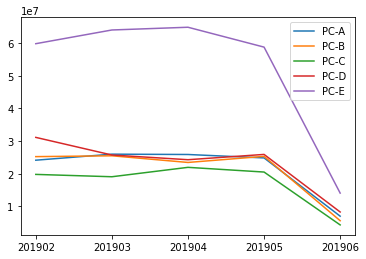

In [42]:
'matplotlibでグラフ描画'
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(graph_data.index),graph_data["PC-A"],label='PC-A')
plt.plot(list(graph_data.index),graph_data["PC-B"],label='PC-B')
plt.plot(list(graph_data.index),graph_data["PC-C"],label='PC-C')
plt.plot(list(graph_data.index),graph_data["PC-D"],label='PC-D')
plt.plot(list(graph_data.index),graph_data["PC-E"],label='PC-E')
plt.legend()